In [110]:
# Dependencies
import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

Openweather api key

In [111]:
api_key = "478ee01ae8b8eae871901fe2bef506c7"

Create a pandas dataframe called location_data
Set two columns in the data frame to be random numbers for both Latitude and Longitude Values

In [112]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()#check


,lat_values,lng_values
0,-36.982796,169.481665
1,89.631332,-171.241918
2,2.537869,-77.424834
3,-71.104433,-135.064140
4,-78.222252,-69.602099


Create two more columns in location_data for city and country. Start your first for loop employing the citipy library to pic the city nearest to the previous created random values for latitude and longitude.  Get both the city name and country code and put the values in the correct columns

In [113]:
location_data['city'] = ""
location_data['country'] = ""

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_values'], row['lng_values']).city_name
    near_country = citipy.nearest_city(row['lat_values'], row['lng_values']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
location_data.head()#check    

,lat_values,lng_values,city,country
0,-36.982796,169.481665,ahipara,nz
1,89.631332,-171.241918,mys shmidta,ru
2,2.537869,-77.424834,argelia,co
3,-71.104433,-135.064140,rikitea,pf
4,-78.222252,-69.602099,ushuaia,ar


Looking at sample size of location_data

In [114]:
len(location_data)

1500

removing the duplicates of location_data based on city, and country values.  Could have used unique.

In [115]:
location_data=location_data.drop_duplicates(['city','country'],keep = "first")
#.unique

Created Temperature, Humidity, Cloudiness, Wind Speed, Longitude (actual), and Latitude (actual) for location_data

In [116]:
location_data['Temp'] = ""
location_data['Humidity'] = ""
location_data['Cloudiness'] = ""
location_data['Wind Speed'] = ""
location_data["Lat"] =""
location_data["Longitude"] =""

Set my sample size, created the target_url variable, and picked what types of units these values will display in

In [117]:


# Set the sample size.
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'


In [118]:
location_data.head()#check

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,-36.982796,169.481665,ahipara,nz,,,,,,
1,89.631332,-171.241918,mys shmidta,ru,,,,,,
2,2.537869,-77.424834,argelia,co,,,,,,
3,-71.104433,-135.064140,rikitea,pf,,,,,,
4,-78.222252,-69.602099,ushuaia,ar,,,,,,


Performed API calls

In [120]:
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Lat", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)
        
 

http://api.openweathermap.org/data/2.5/weather?q=ahipara,nz&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for ahipara, nz
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for mys shmidta, ru
http://api.openweathermap.org/data/2.5/weather?q=argelia,co&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for argelia, co
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=westport,nz&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for westport, nz
http://api.openweathermap.org/data/2.5/weather?q=usinsk,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retriev

Retrieved data for yandoon, mm
http://api.openweathermap.org/data/2.5/weather?q=svetlyy,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for svetlyy, ru
http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for fortuna, us
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for cidreira, br
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for tasiilaq, gl
http://api.openweathermap.org/data/2.5/weather?q=sola,vu&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for sola, vu
http://api.openweathermap.org/data/2.5/weather?q=cherskiy,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for cherskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=talhar,pk&units=imperial&APPID=478ee01ae8b8eae8719

Retrieved data for severo-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?q=huarmey,pe&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for huarmey, pe
http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for vaini, to
http://api.openweathermap.org/data/2.5/weather?q=chapais,ca&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for chapais, ca
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for barrow, us
http://api.openweathermap.org/data/2.5/weather?q=san cristobal,ec&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for nizhneyansk, ru
http://api.openweathermap.org/data/2.5/weather?q=longkou,cn&units=imperial&APP

Retrieved data for adrar, dz
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for carnarvon, au
http://api.openweathermap.org/data/2.5/weather?q=kolda,sn&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for kolda, sn
http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for namibe, ao
http://api.openweathermap.org/data/2.5/weather?q=emerald,au&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for emerald, au
http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for talnakh, ru
http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for avarua, ck
http://api.openweathermap.org/data/2.5/weather?q=swinoujscie,pl&units=imperial&APPID=478ee01ae8b8eae87190

Retrieved data for san blas, mx
http://api.openweathermap.org/data/2.5/weather?q=thinadhoo,mv&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for thinadhoo, mv
http://api.openweathermap.org/data/2.5/weather?q=kodinar,in&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for kodinar, in
http://api.openweathermap.org/data/2.5/weather?q=biak,id&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for biak, id
http://api.openweathermap.org/data/2.5/weather?q=mount gambier,au&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for mount gambier, au
http://api.openweathermap.org/data/2.5/weather?q=lebedinyy,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for lebedinyy, ru
http://api.openweathermap.org/data/2.5/weather?q=palora,ec&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for palora, ec
http://api.openweathermap.org/data/2.5/weather?q=safford,us&units=imperial&APPID=478ee

Retrieved data for bafoulabe, ml
http://api.openweathermap.org/data/2.5/weather?q=geelong,au&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for geelong, au
http://api.openweathermap.org/data/2.5/weather?q=coahuayana,mx&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for coahuayana, mx
http://api.openweathermap.org/data/2.5/weather?q=kushima,jp&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for kushima, jp
http://api.openweathermap.org/data/2.5/weather?q=cabedelo,br&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for cabedelo, br
http://api.openweathermap.org/data/2.5/weather?q=nioro,ml&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for nioro, ml
http://api.openweathermap.org/data/2.5/weather?q=zhanatas,kz&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for zhanatas, kz
http://api.openweathermap.org/data/2.5/weather?q=molepolole,bw&units=imperial&APPID=478ee01

Retrieved data for ponta do sol, cv
http://api.openweathermap.org/data/2.5/weather?q=calama,cl&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for calama, cl
http://api.openweathermap.org/data/2.5/weather?q=ravar,ir&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for ravar, ir
http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for souillac, mu
http://api.openweathermap.org/data/2.5/weather?q=bardiyah,ly&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for bardiyah, ly
http://api.openweathermap.org/data/2.5/weather?q=artyk,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for artyk, ru
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for tiznit, ma
http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&APPID=478ee01ae8b8eae871901fe

Retrieved data for saint-augustin, ca
http://api.openweathermap.org/data/2.5/weather?q=banda aceh,id&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for banda aceh, id
http://api.openweathermap.org/data/2.5/weather?q=corn island,ni&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for corn island, ni
http://api.openweathermap.org/data/2.5/weather?q=richards bay,za&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for richards bay, za
http://api.openweathermap.org/data/2.5/weather?q=moose factory,ca&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for moose factory, ca
http://api.openweathermap.org/data/2.5/weather?q=naushahro firoz,pk&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for naushahro firoz, pk
http://api.openweathermap.org/data/2.5/weather?q=constitucion,cl&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for constitucion, cl
http://api.openweathermap.org/

Retrieved data for buenos aires, cr
http://api.openweathermap.org/data/2.5/weather?q=xuanhua,cn&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for xuanhua, cn
http://api.openweathermap.org/data/2.5/weather?q=nabire,id&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for nabire, id
http://api.openweathermap.org/data/2.5/weather?q=valleyview,ca&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for valleyview, ca
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=quatre cocos,mu&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for quatre cocos, mu
http://api.openweathermap.org/data/2.5/weather?q=todos santos,mx&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for todos santos, mx
http://api.openweathermap.org/data/2.5/weather?q=roald,no&units=im

Retrieved data for sorong, id
http://api.openweathermap.org/data/2.5/weather?q=kyaka,tz&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for kyaka, tz
http://api.openweathermap.org/data/2.5/weather?q=agirish,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for agirish, ru
http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for lorengau, pg
http://api.openweathermap.org/data/2.5/weather?q=wajima,jp&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for wajima, jp
http://api.openweathermap.org/data/2.5/weather?q=aksarka,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for aksarka, ru
http://api.openweathermap.org/data/2.5/weather?q=florence,us&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for florence, us
http://api.openweathermap.org/data/2.5/weather?q=sarangani,ph&units=imperial&APPID=478ee01ae8b8eae8719

Retrieved data for sao joao da barra, br
http://api.openweathermap.org/data/2.5/weather?q=zeya,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for zeya, ru
http://api.openweathermap.org/data/2.5/weather?q=sept-iles,ca&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for sept-iles, ca
http://api.openweathermap.org/data/2.5/weather?q=abrau-dyurso,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for abrau-dyurso, ru
http://api.openweathermap.org/data/2.5/weather?q=bermejo,bo&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for bermejo, bo
http://api.openweathermap.org/data/2.5/weather?q=kon tum,vn&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for kon tum, vn
http://api.openweathermap.org/data/2.5/weather?q=preobrazheniye,ru&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for preobrazheniye, ru
http://api.openweathermap.org/data/2.5/weather?q=charyshskoye,ru&un

Retrieved data for nelson bay, au
http://api.openweathermap.org/data/2.5/weather?q=launceston,au&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for launceston, au
http://api.openweathermap.org/data/2.5/weather?q=orchard homes,us&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for orchard homes, us
http://api.openweathermap.org/data/2.5/weather?q=port augusta,au&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for port augusta, au
http://api.openweathermap.org/data/2.5/weather?q=namanga,ke&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for namanga, ke
http://api.openweathermap.org/data/2.5/weather?q=wanning,cn&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for wanning, cn
http://api.openweathermap.org/data/2.5/weather?q=cururupu,br&units=imperial&APPID=478ee01ae8b8eae871901fe2bef506c7
Retrieved data for cururupu, br
http://api.openweathermap.org/data/2.5/weather?q=ust-maya,ru&units

In [121]:
location_data.head(20)#check

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,-36.982796,169.481665,ahipara,nz,63.06,83,80,3.71,-35.17,173.17
1,89.631332,-171.241918,mys shmidta,ru,26.6,92,40,4.47,52.98,49.71
2,2.537869,-77.424834,argelia,co,68.91,100,92,3.33,2.26,-77.25
3,-71.104433,-135.064140,rikitea,pf,72.69,100,24,7.02,-23.12,-134.97
4,-78.222252,-69.602099,ushuaia,ar,51.8,53,75,3.33,-54.8,-68.3
5,-39.237920,168.391522,westport,nz,57.21,80,0,2.26,-41.75,171.6
6,67.119943,56.803237,usinsk,ru,10.86,85,24,3,65.99,57.53
7,7.370387,-132.957608,atuona,pf,77.46,100,76,4.61,-9.8,-139.03
8,-44.564065,166.711493,te anau,nz,49.15,79,0,3.56,-45.42,167.72
9,57.181541,-135.137278,sitka,us,49.91,100,90,17.22,57.05,-135.33


In [122]:
# check the total sample size.
len(location_data)

639

In [123]:
# Save the DataFrame as a csv
location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)
		


Used Pandas to change string values to numerics for plotting

In [124]:
location_data['Lat'] = pd.to_numeric(location_data['Lat'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')

#then drop na


In [125]:
location_data.head()#check

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,-36.982796,169.481665,ahipara,nz,63.06,83.0,80.0,3.71,-35.17,173.17
1,89.631332,-171.241918,mys shmidta,ru,26.60,92.0,40.0,4.47,52.98,49.71
2,2.537869,-77.424834,argelia,co,68.91,100.0,92.0,3.33,2.26,-77.25
3,-71.104433,-135.064140,rikitea,pf,72.69,100.0,24.0,7.02,-23.12,-134.97
4,-78.222252,-69.602099,ushuaia,ar,51.80,53.0,75.0,3.33,-54.80,-68.3


Plots

Temperature Vs. Latitude

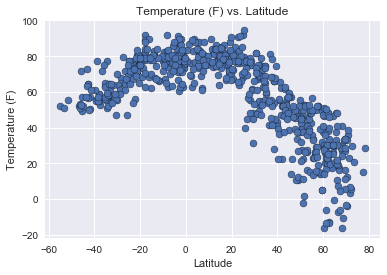

In [126]:
x= location_data["Lat"]
y= location_data["Temp"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Temperature (F) vs. Latitude')
plt.ylabel("Temperature (F)")
plt.xlabel('Latitude')
plt.show()

Humidity (%) vs. Latitude

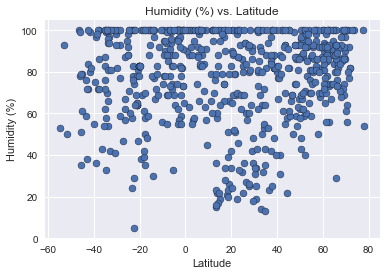

In [127]:
x= location_data["Lat"]
y= location_data["Humidity"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Humidity (%) vs. Latitude')
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.show()

Cloudiness (%) vs. Latitude

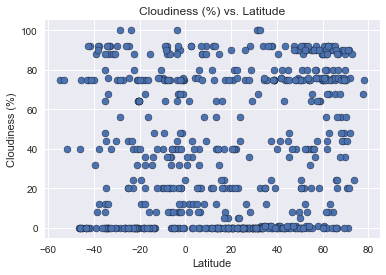

In [128]:
x= location_data["Lat"]
y= location_data["Cloudiness"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.show()

Wind Speed (mph) vs. Latitude

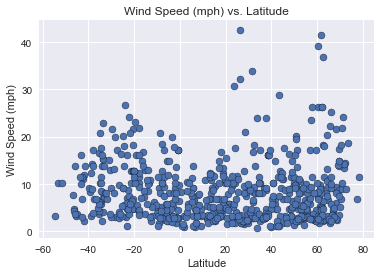

In [129]:
x= location_data["Lat"]
y= location_data["Wind Speed"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Wind Speed (mph) vs. Latitude')
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.show()